# k-Means Clustering and Principal Component Analysis

# Data Dictionary

- Age: Age of the patient (of type integer).
- Gender: Gender of the patient (has values "Male," "Female," and "Other").
- Hypertension: Indicates if the patient has hypertension (0 for No, 1 for Yes).
- Heart Disease: Indicates if the patient has a heart disease (0 for No, 1 for Yes).
- Ever Married: Whether the patient has ever been married ("No" or "Yes").
- Work Type: Type of work the patient is engaged in ("Children," "Govt_job," "Never_worked," "Private," or "Self-employed").
- Residence Type: Type of residence of the patient ("Rural" or "Urban").
- Average Glucose Level: Average glucose level in the patient's blood.
- BMI: Body Mass Index (BMI) of the patient.
- Smoking Status: Smoking status of the patient ("formerly smoked," "never smoked," "smokes," or "Unknown").
- The Target column: Stroke - Indicates if the patient had a stroke (1 for Yes, 0 for No).

# Table of Contents
1. [Import Libraries](#section1)
2. [Load the Dataset](#section2)
3. [Data Analysis](#section3)
4. [Preprocessed Data](#section4)
5. [PCA & k-Means Clustering](#section5)
6. [Optimization and Hyper-parameter Tuning](#section6)

## <a id='section1'></a>
## Section 1: Import Libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import itertools
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


<a id='section2'></a>
## Section 2: Load the Dataset

* load data from csv format into a pandas dataframe

In [45]:
data = pd.read_csv("/healthcare-dataset-stroke-data.csv")
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married   
0   9046    Male  67.0             0              1          Yes  \
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status   
0        Private          Urban             228.69  36.6  formerly smoked  \
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


<a id='section3'></a>
## Section 3: Data Analysis

In [46]:
required_columns = [
    'id', 'gender', 'age', 'hypertension', 'heart_disease', 
    'ever_married', 'work_type', 'Residence_type', 
    'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'
]
if set(required_columns).issubset(data.columns):
    print("All required columns are present.")
else:
    missing_columns = set(required_columns) - set(data.columns)
    print(f"The following required columns are missing: {', '.join(missing_columns)}")

All required columns are present.


* Numerical Variables:

[age] Age of the individuals

[avg_glucose_level] Average glucose level in the blood

[bmi] Body Mass Index, which provides an indication of body weight relative to height

* Binary Variables:

[hypertension] Indicates if an individual has hypertension (1 for Yes and 0 for No)

[heart_disease] Indicates if an individual has heart disease (1 for Yes and 0 for No)

[stroke] Indicates if an individual has ever had a stroke (1 for Yes and 0 for No)

* Categorical Variables:

[ever_married] Marital status of the individuals (Yes or No)

[Residence_type] Type of residence (Urban or Rural)

[gender] Gender of the individuals

[work_type] Employment type/status of the individual

[smoking_status] Smoking behavior of the individuals




<a id='section4'></a>
## Section 4: Preprocessed Data

Variable Classification:

* numerical_features = ['age', 'avg_glucose_level', 'bmi']
* binary_features = ['hypertension', 'heart_disease', 'stroke']
* categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [47]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['hypertension', 'heart_disease', 'stroke']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Pre-processing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

data_preprocessed = preprocessor.fit_transform(data)


1. Numerical Variables: The missing values are imputed with the mean, and Standard Scaling is applied.
2. Categorised Varibales: Missing values are imputed with the most frequent category, followed by One-Hot Encoding.
3. Binary Variables: Remained unchanged
 

<a id='section5'></a>
## Section 5: PCA & k-Means Clustering

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


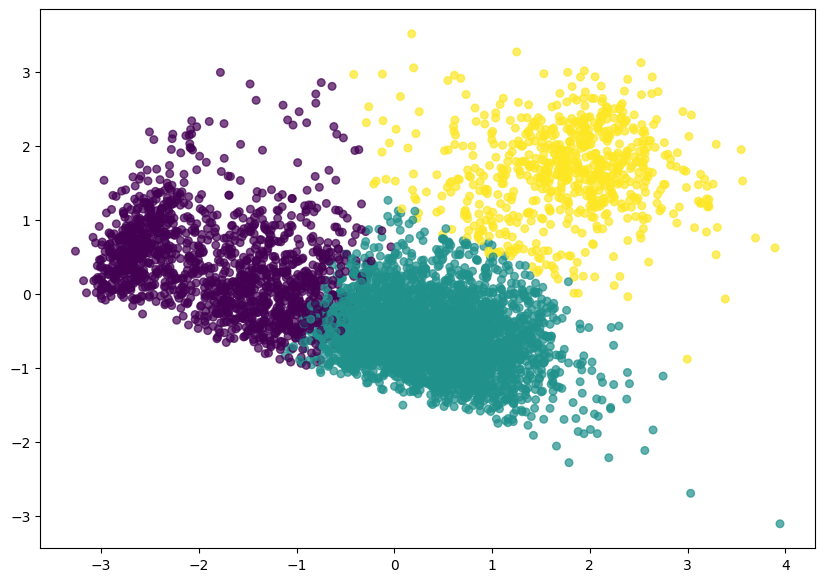

In [50]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_preprocessed)

# The dimensionality of the data is using 2 principal components for the visualization.

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_preprocessed)

plt.figure(figsize=(10, 7))

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o', s=30, alpha=0.7)


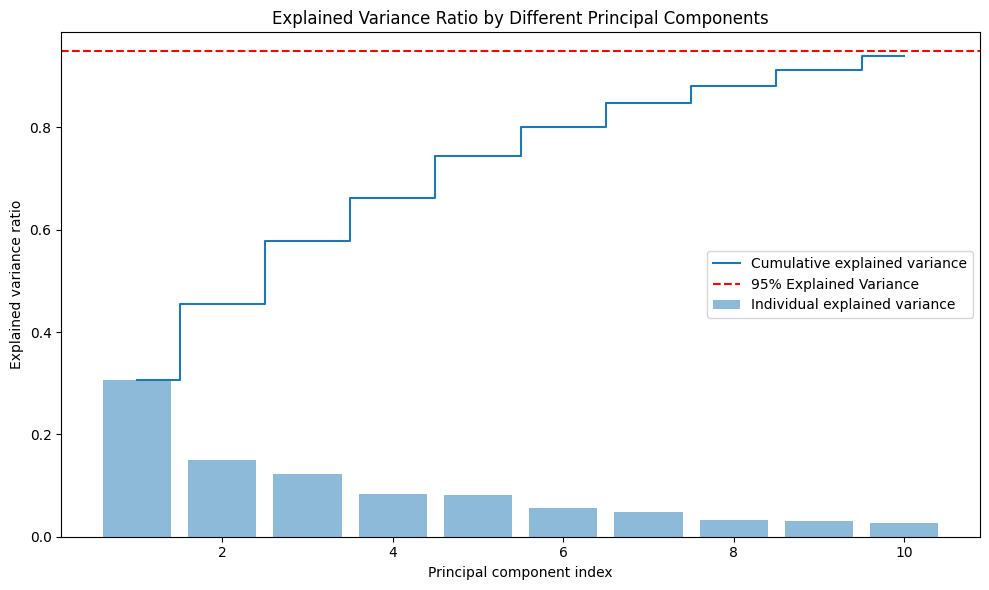

In [51]:
# Fitting 
pca = PCA(n_components=10) 
pca_result = pca.fit(data_preprocessed)

# Visualizing Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance Ratio by Different Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* The number of components explain a satisfactory amount of variance in the data, which is above 95%

* Bar Plot
    - Represents the amount of variance explained by each principal component.

* Step Line: 
    - Shows the cumulative sum of explained variances by the principal components

* Horizontal Line: 
    - A line indicating the level at which 95% of the variance is explained can help determine the number of components to retain. In this case I selected n_components = 10

## <a id='section6'></a>
## Section 6: Optimization and Hyper-parameter Tuning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

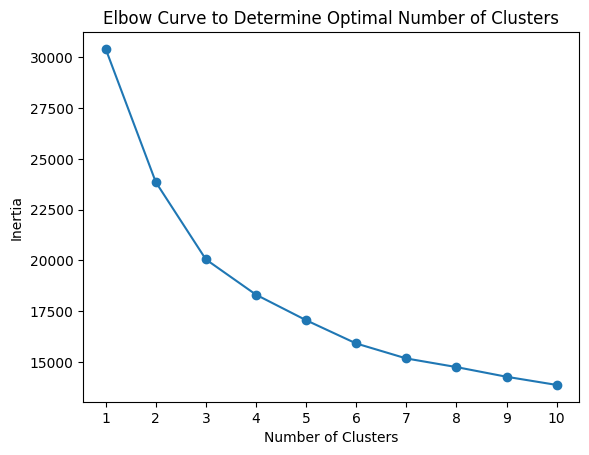

In [52]:
# KMeans: Finding Optimal Number of Clusters

inertia = []

num_clusters = range(1, 11)
for k in num_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_preprocessed)
    inertia.append(model.inertia_)

plt.plot(num_clusters, inertia, '-o')
plt.title('Elbow Curve to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.show()

### Elbow Curve: Through plotting the elbow curve, one is able to  observe a point where the reduction in inertia slows down, "the elbow point". The value for the optimal number of clusters in 3 for this dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


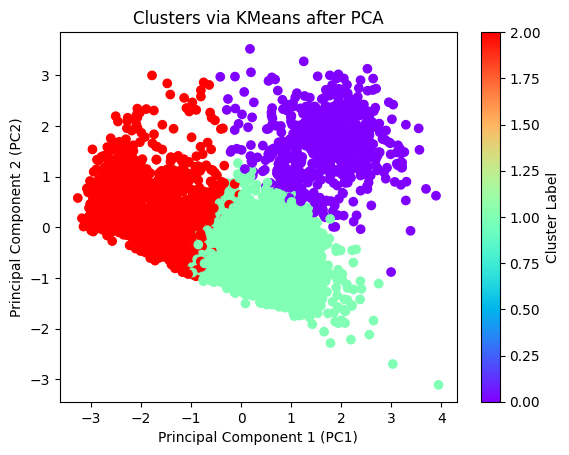

In [54]:
# Visualizing Clusters using only the first two principal components for visualization
optimal_clusters = 3 
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans_model.fit_predict(data_preprocessed)

pca_fit = pca.fit_transform(data_preprocessed)

plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Clusters via KMeans after PCA')
plt.colorbar(label='Cluster Label')
plt.show()